In [1]:
library(pheatmap)
library(RColorBrewer)
library(readxl)
library(ggplot2)

# Gene import

In [2]:
cellchat<-read_excel('./CELLCHAT_GENE_hd_specific.xlsx')
deg_b<-read.csv('./differential_marker_b.csv')
deg_mono<-read.csv('./differential_marker_mono.csv')
features<-read.csv('./sle_feature_importance_bulk.csv')

New names:
* `` -> ...1



In [3]:
####feature importance cellchat part
cell<-intersect(cellchat$`...1`,features$feature_importance)

####feature importance DEG part
deg_b<-intersect(deg_b$gene,features$feature_importance)
deg_mono<-intersect(deg_mono$gene,features$feature_importance)
deg<-unique(c(deg_b,deg_mono))
deg<-setdiff(deg,cell)

In [4]:
sle<-read.csv('../RNA_seq_for_autoimmune_disease/GSE164457_SLE_fpkm.csv',row.names=1)
hd1<-read.csv('../RNA_seq_for_autoimmune_disease/health_bulk/GSE169687_HC_fpkm.csv',sep=',',row.names=1)
hd2<-read.csv('../RNA_seq_for_autoimmune_disease/health_bulk/GSE169687_HC_24wk_fpkm.csv',sep=',',row.names=1)
colnames(hd1)<-paste('health',seq(1,14,1),sep='')
colnames(hd2)<-paste('health',seq(15,41,1),sep='')

In [5]:
sle<-sle[features$feature_importance,]
hd1<-hd1[features$feature_importance,]
hd2<-hd2[features$feature_importance,]

In [6]:
data<-cbind(sle,hd1,hd2)

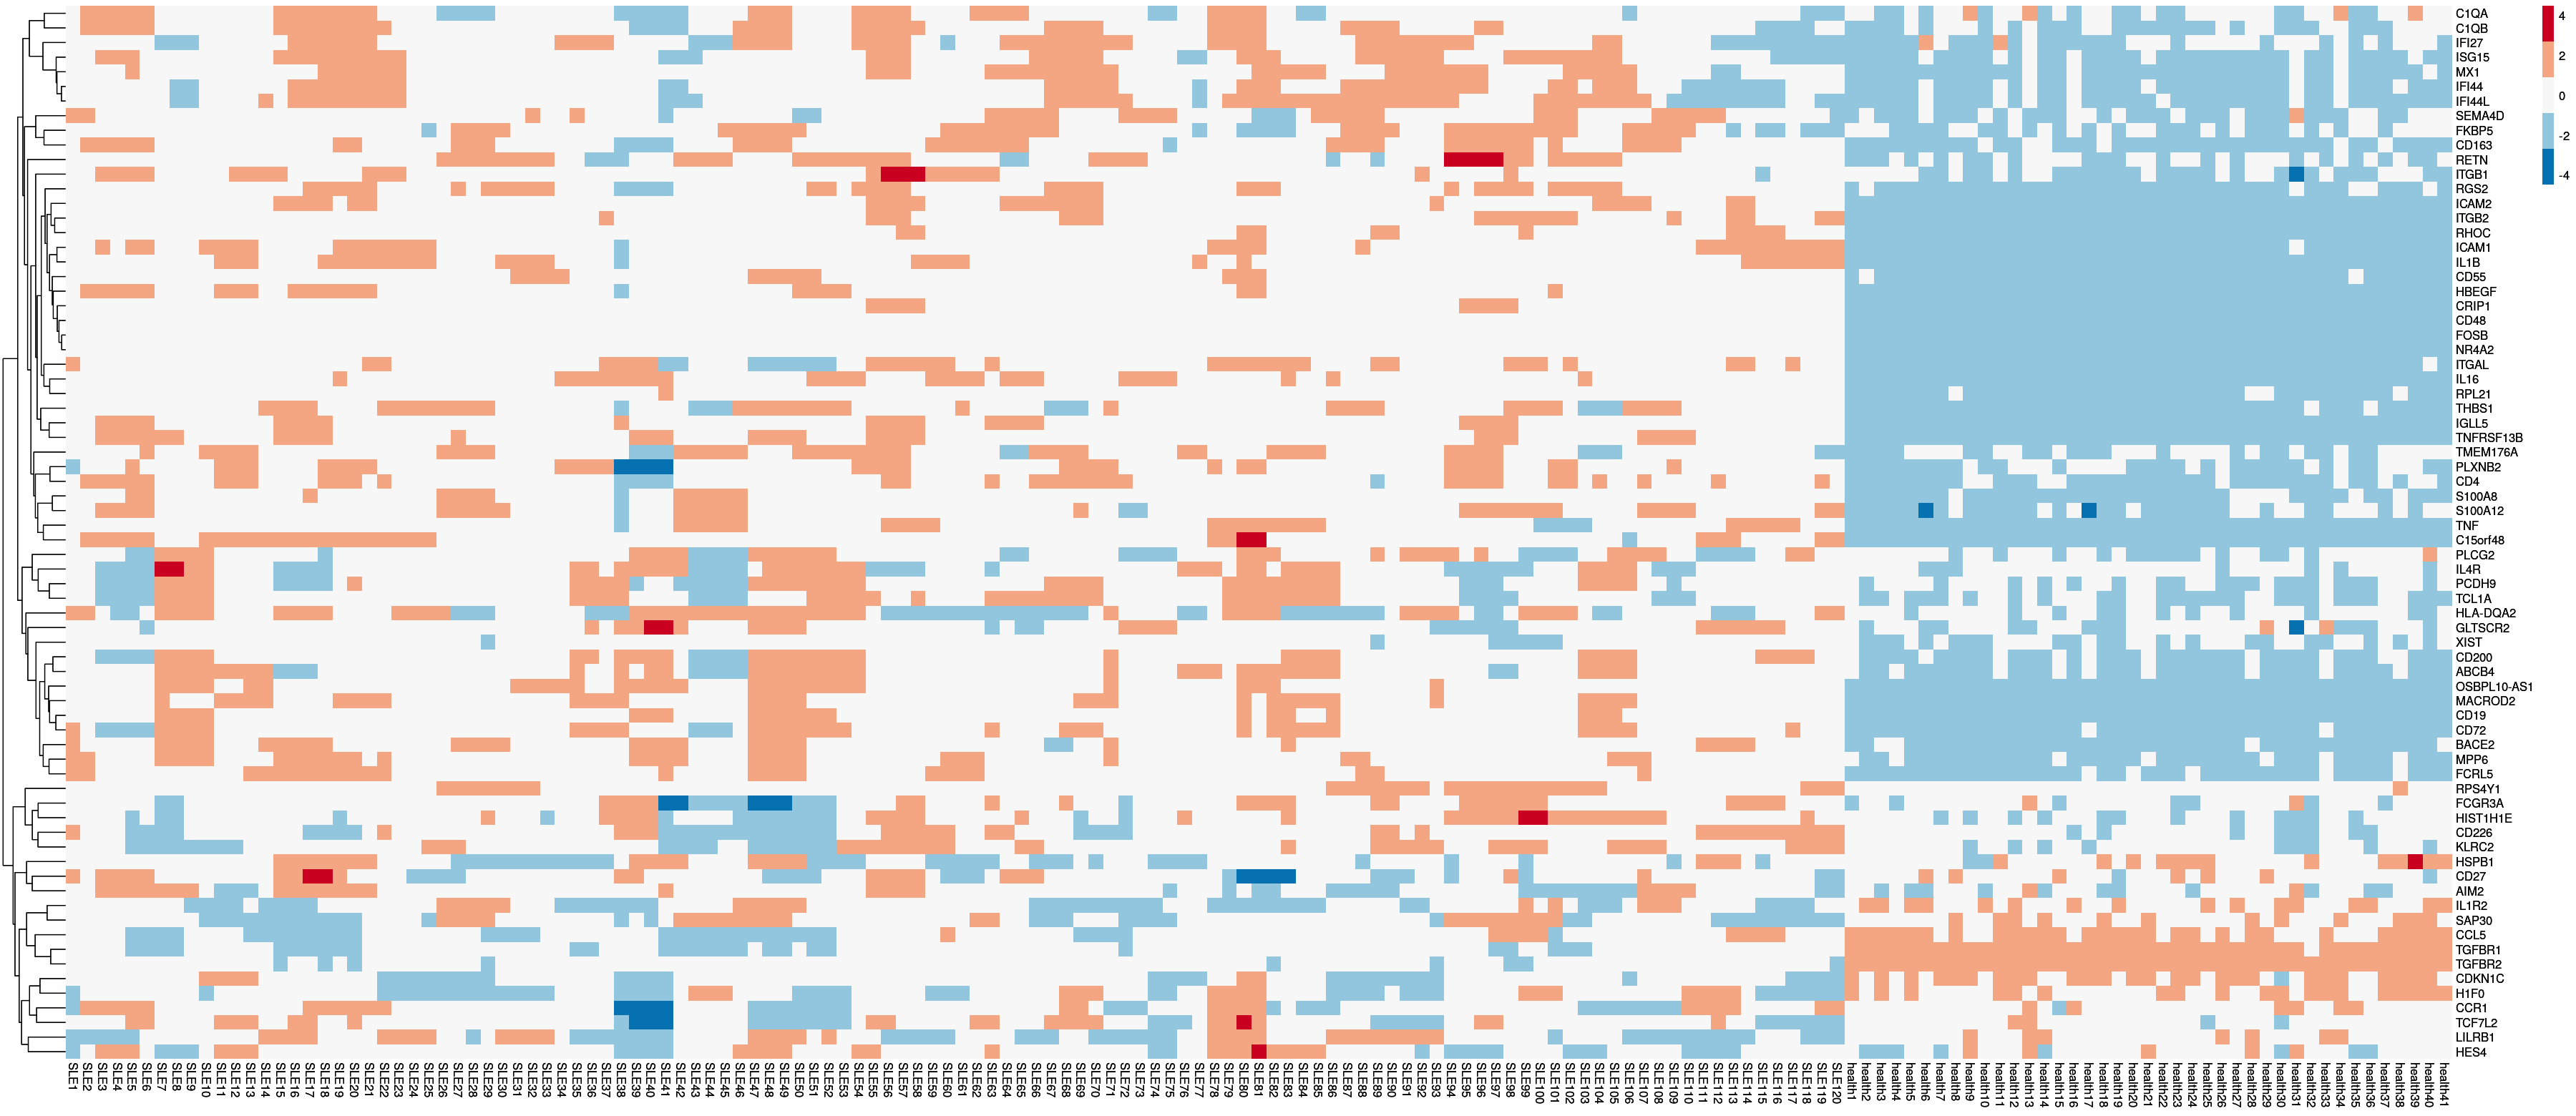

In [7]:
options(repr.plot.height=13,repr.plot.width=30)
p <- pheatmap(log2(data+1),
         show_colnames = T,scale='row',show_rownames = T,cluster_col=F,
         col = rev(brewer.pal(n =5, name = "RdBu")))
p

# heatmap for machine learning gene importance cellchat part

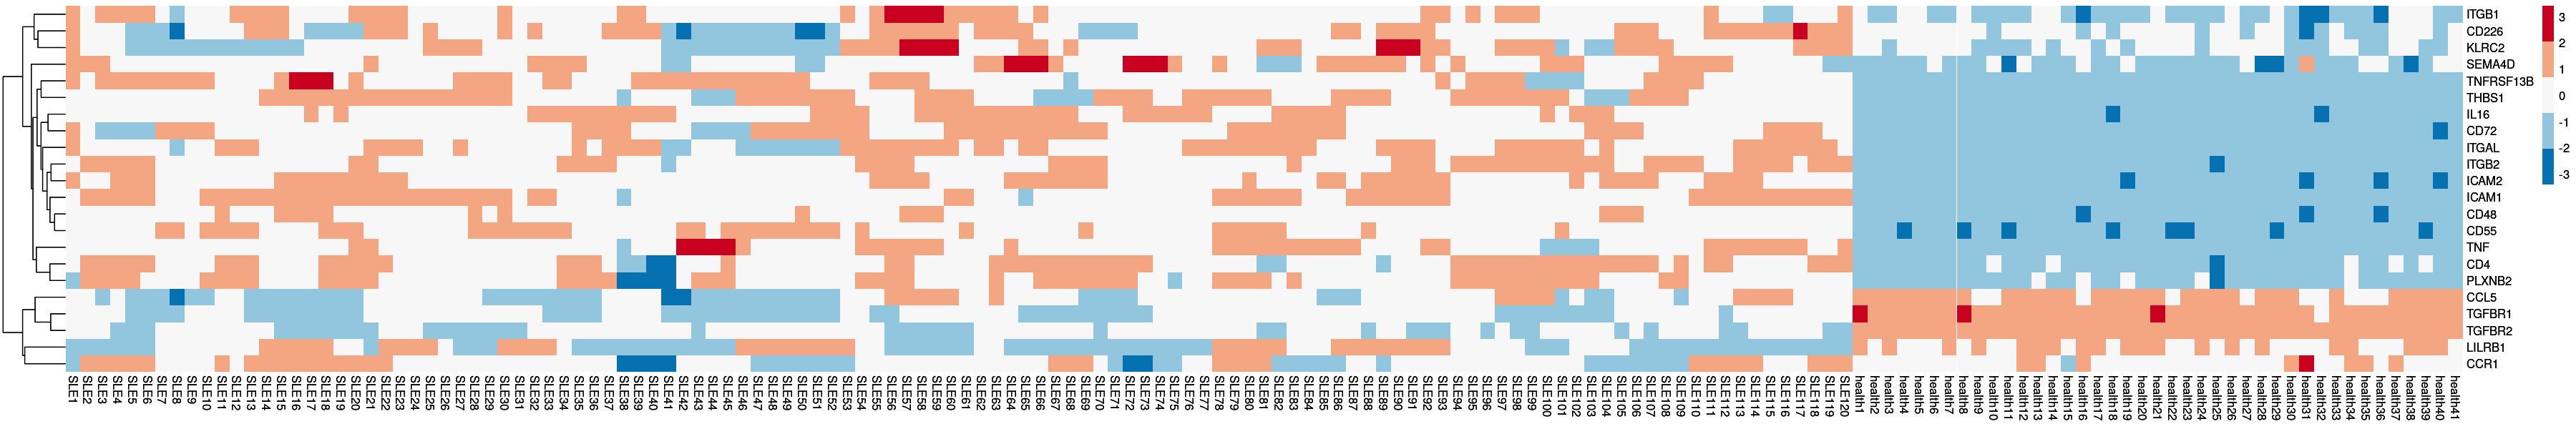

In [8]:
options(repr.plot.height=5,repr.plot.width=30)
p1 <- pheatmap(log2(data+1)[cell,],
         show_colnames = T,scale='row',show_rownames = T,cluster_col=F,
         col = rev(brewer.pal(n =5, name = "RdBu")))
p1
#ggsave("../sle_picture/Fig8/cellchat_heatmap.pdf",p1,height=5,width=30)

# heatmap for machine learning gene importance DEG part

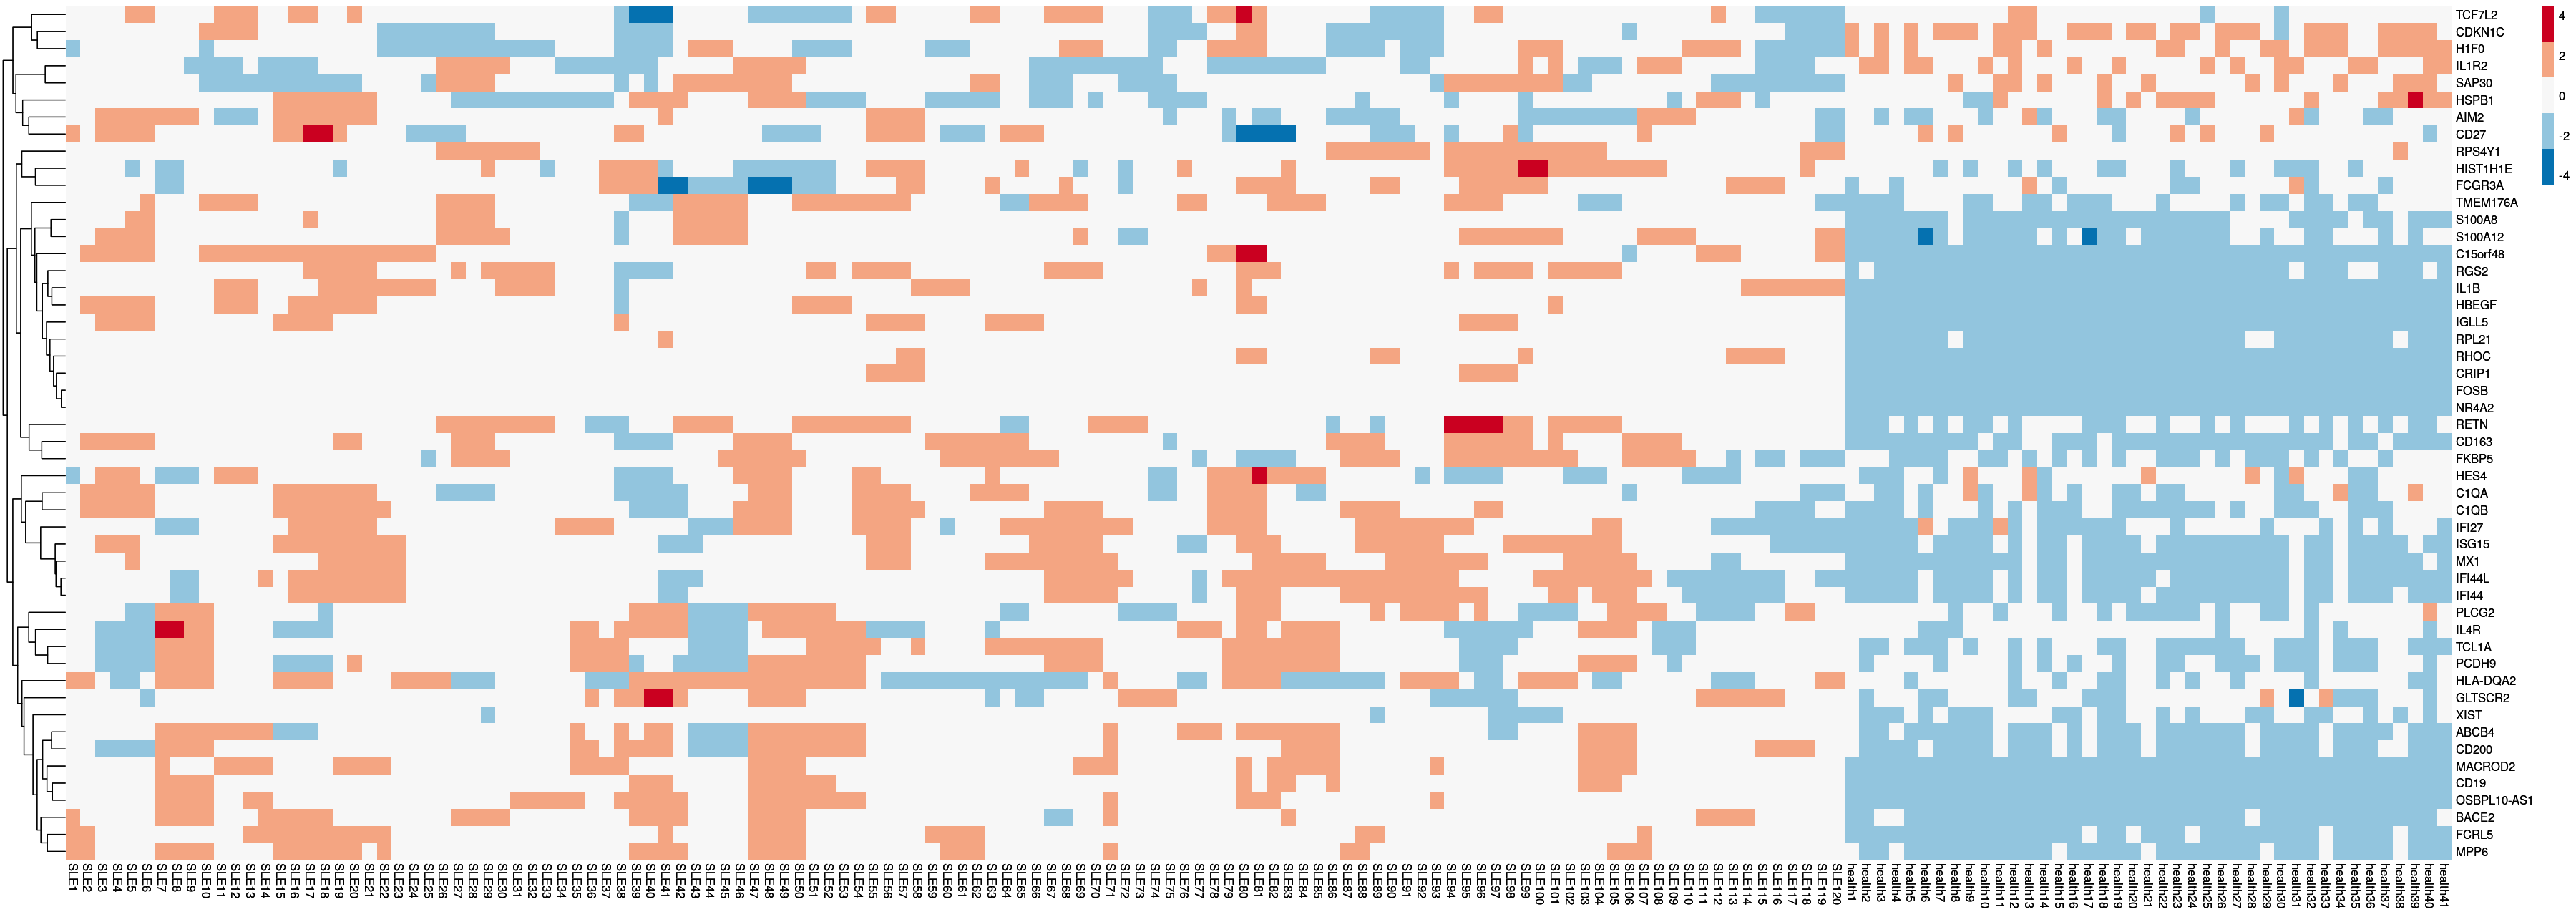

In [9]:
options(repr.plot.height=10.68,repr.plot.width=30)
p2 <- pheatmap(log2(data+1)[deg,],
         show_colnames = T,scale='row',show_rownames = T,cluster_col=F,
         col = rev(brewer.pal(n =5, name = "RdBu")))
p2
#ggsave("../sle_picture/Fig8/DEG_heatmap.pdf",p2,height=10.68,width=30)